# Graphing Data with histogram and kernal density estimate

In [10]:
#todo:
# get all stocks monthly return data and upload it somewhere bcuz its hard to find
# make website for data
# update data daily monthly
# make data downloadable
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.mlab import GaussianKDE
from matplotlib.ticker import FormatStrFormatter
import yfinance as yf

In [11]:
col = 'Returns' # column being graphed
file_name = 'historic data\\^IXIC.csv' # name of the csv file
show_density = False # y axis: true = density, false = frequency
title = 'NASDAQ Monthly Returns' # graph title
x_axis_label = 'Returns (%)' # x axis title
quality = 1.5 # output image quality, default: 1.5
bin_size = 1 # size of bins on graph, default: 2
bin_label_freq = 4 # frequency of bin labels, default: 4
x_axis_font_size = 9 # font size for the x axis, default: 9
shift = 0 # bin label shift, default: 1

In [12]:
df = pd.read_csv(file_name)[col]

In [13]:
for i in range(len(df)):
    df[i] = df[i]*100

In [14]:
# get data statistics
r_mean = df.mean()
r_median = df.median()
r_range = (df.min(), df.max())
r_std = df.std()
r_skew = df.skew()
r_kurt = df.kurtosis()

In [15]:
# print statistics of data
print(f'Mean: {round(r_mean, 4)}%')
print(f'Median: {round(r_median, 4)}%')
print(f'Range: {round(r_range[0], 4)}%, {round(r_range[1], 4)}%')
print(f'Standard deviation: {round(r_std, 4)}%')
print(f'Skew: {round(r_skew, 4)}%')
print(f'Kurtosis: {round(r_kurt, 4)}%')

Mean: 1.0163%
Median: 1.7244%
Range: -27.2339%, 21.9759%
Standard deviation: 6.1925%
Skew: -0.5663%
Kurtosis: 1.9939%


In [16]:
# get kernel density estimate (KDE)
kde = GaussianKDE(df)

In [17]:
# setting bins and the labels
bins = list(range(round(r_range[0])-1, round(r_range[1])+1, bin_size))
bin_labels = list(range(round(r_range[0])+shift, 0-round(r_range[0])+1, bin_label_freq))

C:\Users\olive\AppData\Local\Temp\ipykernel_24300\2556472519.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


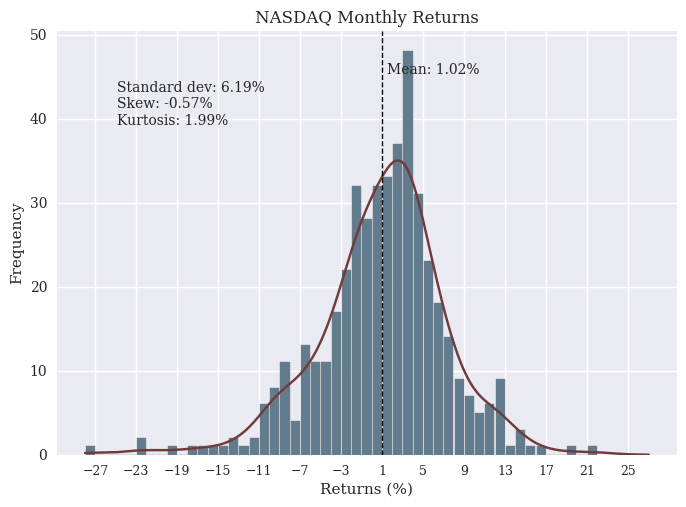

In [18]:
# style like seaborn
plt.style.use('seaborn')

# change font
plt.rcParams["font.family"] = "serif"

# create histogram plot
fig, ax = plt.subplots()
ax.hist(x=df, bins=bins, rwidth=0.9, density=show_density, color='#607c8e', edgecolor='gray')

# create kernel density estimate (KDE) plot
xx = np.linspace(round(r_range[0])-1, 0-round(r_range[0]), 2000)
if show_density:
    ax.plot(xx, kde(xx), color='#713B3B')
    plt.ylabel('Density')
else:
    ax.plot(xx, kde(xx)*len(df)*bin_size, color='#713B3B')
    plt.ylabel('Frequency')

# add extra info about data
plt.figtext(.2, .77, f'Standard dev: {round(r_std, 2)}%')
plt.figtext(.2, .74, f'Skew: {round(r_skew, 2)}%')
plt.figtext(.2, .71, f'Kurtosis: {round(r_kurt, 2)}%')

# line for mean
plt.axvline(r_mean, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(r_mean*1.4, max_ylim*0.9, f'Mean: {round(r_mean, 2)}%')

# add labels
plt.title(title)
plt.xlabel(x_axis_label)

# reformat x axis
ax.set_xticks(bin_labels)
plt.xticks(fontsize=x_axis_font_size)

# save as png
plt.savefig('graph.png', dpi=int(100*quality))